<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План проекта:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
# Импорт библиотек
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from numpy.random import RandomState

In [2]:
# Откроем файл с обучающей выборкой
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train.head(10) # вывод первых 10 строк

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [3]:
# вывод общей информации
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
# проверка на дубликаты
df_train.duplicated().sum()

0

Можно было бы изменить тип столбца date, но вскоре он будет удален. Так же во многих стоолбцах заметны пропуски, их достаточно мало, можно их удалить. Явных дубликатов не найдено.

Проверим, что эффективность обогащения рассчитана правильно. Обучим модель линейной регрессии и узнаем MAE для rougher.output.recovery

In [5]:
# Откроем файл с тестовой выборкой
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test.head(10) # вывод первых 10 строк

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
df_test.duplicated().sum()

0

Ситуация от предыдущего датафрейма отличается не сильно, но не хвататет некоторых признаков, сейчас узнаем каких.

In [8]:
test_columns = list(df_test.columns) # создаем list с признаками из тестовой выборки
dif = df_train.drop(test_columns, axis=1) # удаляем признаки из тестовой в обучающей
dif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


В тестовом датафрейме отсутствуют финальные характеристики, параметры продукта, расчетные характеристики, отвальные хвосты.

In [9]:
# Откроем файл со всеми данными
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full.head(10) # вывод первых 10 строк

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
df_full.duplicated().sum()

0

Cитуация такая же, как с обучающей выборкой.

Проверим, что эффективность обогащения рассчитана правильно.

In [12]:
# Посчитаем recovery по формуле и вычислим MAE для rougher.output.recovery
df_train['recovery'] = ((
    df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))
    / (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))
    * 100)  
print(mean_absolute_error(df_train['recovery'], df_train['rougher.output.recovery']))

9.73512347450521e-15


MAE очень маленькое, значит все расчитано правильно.

Проведем небольшую предобработку данных - заполним пропуски с помощью fillna(method='ffill') которая для каждого признака заполнит пропуски на основании предыдущей записи. Здесь это применимо т.к. данные представляют из себя срезы по времени и соответсвенно по времени и отсортированы. Так же добавим недостающие признаки тестовой выборке из полного датафрейма.

In [13]:
# добавление таргетов в тестовую выборку
df_test = pd.merge(df_test, df_full[['date','rougher.output.recovery','final.output.recovery']], on="date")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [14]:
# Заполним пропуски 
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

## Анализ данных

 Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

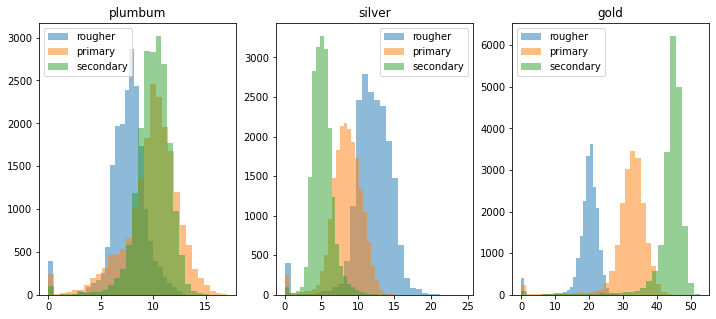

In [15]:
rougher_ag = df_full["rougher.output.concentrate_ag"]
rougher_au = df_full["rougher.output.concentrate_au"]
rougher_pb = df_full["rougher.output.concentrate_pb"]

secondary_ag = df_full["final.output.concentrate_ag"]
secondary_au = df_full["final.output.concentrate_au"]
secondary_pb = df_full["final.output.concentrate_pb"]

primary_ag = df_full["primary_cleaner.output.concentrate_ag"]
primary_au = df_full["primary_cleaner.output.concentrate_au"]
primary_pb = df_full["primary_cleaner.output.concentrate_pb"]

plumbum = [rougher_pb, primary_pb, secondary_pb]
silver = [rougher_ag, primary_ag, secondary_ag]
gold = [rougher_au, primary_au, secondary_au]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for metal, ax, name in zip([ plumbum, silver, gold], axes, ["plumbum", "silver", "gold"]):
    for stage, color, label in zip(metal, ["r", "y", "g"], ["rougher", "primary", "secondary"]):
        ax.hist(stage, alpha=0.5, bins=30, label=label)
    ax.legend()
    ax.set_title(name)
plt.show()

Видно, что концентрация серебра и свинца на каждом этапе очистки падает, а концентрация золота растет. Распределение нормальное.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

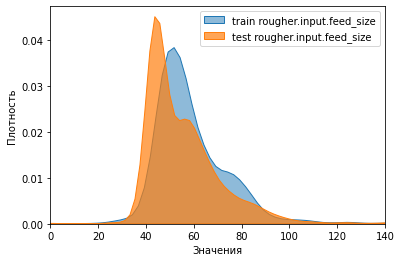

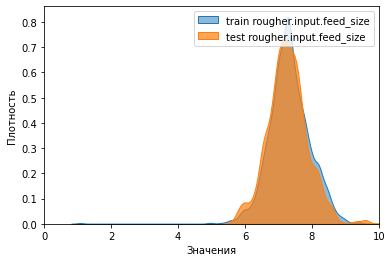

In [16]:
# Для сравнения используем метод ядерной оценки плотности, который пытается аппроксимировать 
# гистограмму непрерывной функцией при помощи ядерной оценки плотности.
# Создадим функцию для постройки этого графика и сравним распределения гранул сырья для черного и первично очищенного
def kde(feed_size, xmax):
    sns.kdeplot(df_train[feed_size], label='train rougher.input.feed_size', alpha=0.5, shade=True)
    sns.kdeplot(df_test[feed_size], label='test rougher.input.feed_size', alpha=0.7, shade=True)
    
    plt.xlim([0, xmax])
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend(loc="upper right")
    plt.show()
    
kde('rougher.input.feed_size', 140)
kde('primary_cleaner.input.feed_size', 10)

Распределения достаточно близки, можно сделать вывод, что оценки будут сравнимы.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

       rougher_input_feed_sum
count            19245.000000
mean                57.407926
std                  7.165219
min                  0.040000
25%                 53.660745
50%                 57.647093
75%                 62.012223
max                 76.978947


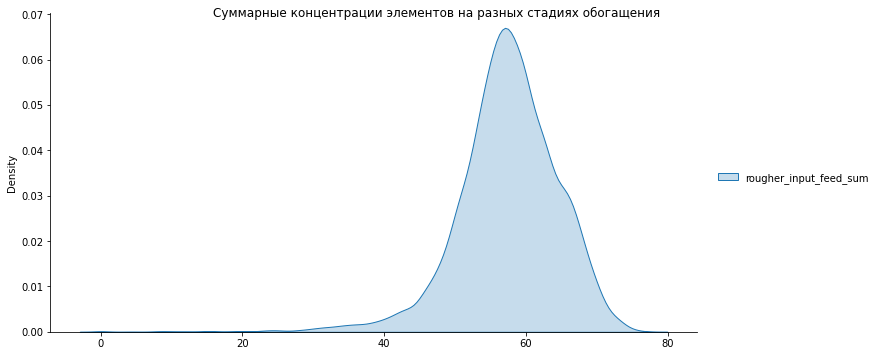

In [17]:
# Проссумируем концентрацию всех веществ на каждом этапе, запишем это в отдельные переменные, создадим датафрейм со всеми ними
rougher_input_feed_sum = (df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + 
                          df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol'])

rougher_output_concentrate_sum = (df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + 
                                  df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'])

primary_cleaner_output_concentrate_sum = (df_full['primary_cleaner.output.concentrate_au'] + 
                                          df_full['primary_cleaner.output.concentrate_ag'] + 
                                          df_full['primary_cleaner.output.concentrate_pb'] + 
                                          df_full['primary_cleaner.output.concentrate_sol'])

final_output_concentrate_sum = (df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + 
                                df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'])

sum_concentrate = pd.DataFrame()
sum_concentrate['rougher_input_feed_sum'] = \
    df_full['rougher.input.feed_au'] + \
    df_full['rougher.input.feed_ag'] + \
    df_full['rougher.input.feed_pb'] + \
    df_full['rougher.input.feed_sol']

plot = sns.displot(sum_concentrate, kind="kde", fill=True, aspect=2)
plot.fig.suptitle('Суммарные концентрации элементов на разных стадиях обогащения')

print(sum_concentrate.describe())

Видно, что есть знаечния равные 0, их нужно удалить. Заодно удалим и остальные нули, на других этапах.


In [18]:
df_full = df_full[df_full[['final.output.concentrate_au','final.output.concentrate_ag',
                           'final.output.concentrate_pb','final.output.concentrate_sol']].min(axis=1) > 0]
df_full = df_full[df_full[['rougher.input.feed_au', 'rougher.input.feed_ag',
                           'rougher.input.feed_pb', 'rougher.input.feed_sol']].min(axis=1) > 0]
df_full = df_full[df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                           'rougher.output.concentrate_pb','rougher.output.concentrate_sol']].min(axis=1) > 0]
df_full = df_full[df_full[['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
                           'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].min(axis=1) > 0]
len(df_full)

18848

Удаление было произведено из всего датафрейма, теперь нужно убрать эти нули в обучающей выборке.

In [19]:
# Оставляю в обучающей выборке только те строки, которые входят в уже отфильтрованный датафрейм с помощью merge
df_train = pd.merge(df_train, df_full[['date']], on="date")
len(df_train)

13725

## Модель

Перед обучением созданием модели удалим признак date, он нам больше не поможет.

In [20]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

In [21]:
# Создадим функцию для подсчета sMAPE
def sMAPE(predict, target):
    smape = abs(target-predict)/((abs(target)+abs(predict))/2)*100
    smape=smape.fillna(value=0)
    smape = sum(smape)/len(smape)
    return smape

Подберем модель для rougher.

In [82]:
# выделим features и target для обучающей выборки
rougher_columns = [c for c in df_test.columns if "rougher" in c and c != "rougher.output.recovery"] # Берем только признаки rougher
x_rougher = df_train[rougher_columns]
y_rougher = df_train['rougher.output.recovery']

# масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_rougher)
x_rougher = scaler.transform(x_rougher)

# обучим модель случайного леса
rfc = RandomForestRegressor(random_state=12345)

parametrs = { 'n_estimators': range (30, 61, 10), # число деревьев в лесу
              'max_depth': range (5,11, 2)} # глубина

grid = GridSearchCV(rfc, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid.fit(x_rougher, y_rougher)

print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучшый счет:', grid.best_score_, '\n')

Лучшие параметры: {'max_depth': 5, 'n_estimators': 30} 

Лучшый счет: -6.59206030332227 



Неплохой результат - чем ближе к 0, тем лучше. Посмотрим, что нам покажет линейнейная регрессия

In [83]:
# Обучим так же модель линейной регресии, будем использовать кросс-валидацию
model_reg = LinearRegression()

scores = cross_val_score(model_reg, x_rougher, y_rougher, 
                        cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
final_score = pd.Series(scores).mean()
print('sMAPE на обучающей выборке:', final_score)

sMAPE на обучающей выборке: -6.677118661212688


Линейная регрессия показала результат немного хуже. Будем тестить на случайном лесу.

In [23]:
# выделим features и target для тестовой выборки
x_test_rougher = df_test[rougher_columns]
y_test_rougher = df_test['rougher.output.recovery']

In [24]:
# cделаем масштабирование признаков
x_test_rougher = scaler.transform(x_test_rougher)

In [86]:
pred = grid.predict(x_test_rougher)
rougher_sMAPE = sMAPE(y_test_rougher, pred)
print(rougher_sMAPE)

8.360437757036706


Проверим модель на адекватность с помощью DummyRegressor

In [25]:
X = np.array(x_test_rougher)
y = np.array(y_test_rougher)
dummy = DummyRegressor(strategy='mean')
dummy.fit(X, y)
dummy_pred = dummy.predict(x_test_rougher)
dummy.score(x_test_rougher, y_test_rougher)
sMAPE(y_test_rougher, dummy_pred)

8.78264680914839

C моделью все хорошо.

Хорошие результаты, осталось лишь подобрать модель для final.output.recovery и вычислить на ней sMAPE.

Теперь подберем модель для final.output.recovery.

In [41]:
# выделим features и target
x_train = df_train[test_columns]
x_train = x_train.drop('final.output.recovery', axis=1)
y_train = df_train['final.output.recovery']


# проведем масштабирование
scaler.fit(x_train)
x_train = scaler.transform(x_train)

# обучим модель случайного леса
rfc_final = RandomForestRegressor(random_state=12345)

parametrs = { # 'n_estimators': range (40, 81, 10), # число деревьев в лесу
              'max_depth': range (6,11, 2)} # глубина

grid = GridSearchCV(rfc_final, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid.fit(x_train, y_train)

print('Лучшие параметры:', grid.best_params_, '\n')
print('Лучшый счет:', grid.best_score_, '\n')

Лучшие параметры: {'max_depth': 6, 'n_estimators': 40} 

Лучшый счет: -9.206509252713776 



Хороший результат, посмотрим на модель линейной регрессии.

In [76]:
model_reg_final = LinearRegression()

scores = cross_val_score(model_reg_final, x_train, y_train, 
                        cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
final_score = pd.Series(scores).mean()
print('sMAPE:', final_score)

sMAPE: -8.245181484338023


sMAPE лучше у случайного леса, его и будем использовать в тесте.

In [45]:
# выделим features и target для тестовой выборки
x_test = df_test[test_columns]
# x_test = x_test.drop('final.output.recovery', axis=1)
y_test = df_test['final.output.recovery']

In [ ]:
# выделим features и target для тестовой выборки
x_test = df_test[test_columns]
x_test = x_test.drop('final.output.recovery', axis=1)
y_test = df_test['final.output.recovery']

# cделаем масштабирование признаков
x_test = scaler.transform(x_test)

pred = grid.predict(x_test)
final_sMAPE = sMAPE(y_test, pred)
print(final_sMAPE)

Проверка на адеккватсность

In [47]:
X = np.array(x_test)
y = np.array(y_test)
dummy = DummyRegressor(strategy='mean')
dummy.fit(X, y)
dummy_pred = dummy.predict(x_test)
dummy.score(x_test, y_test)
sMAPE(y_test, dummy_pred)

9.37099559434784

In [91]:
print('Финальная sMAPE:', (0.25 * rougher_sMAPE + 0.75 * final_sMAPE))

Финальная sMAPE: 8.117174017095385


## Вывод

Была проведена предобработка данных:
-были заполнены пропуски на основании предыдущей записи
-в тестовую выборку были добавлены недостающие признаки

Мы узнали как менялась концентрация металлов - концентрация серебра и свинца на каждом этапе очистки падает, а концентрация золота растет. Распределение нормальное.

Распределения размеров гранул сырья на обучающей и тестовой выборках не сильно отличается.

Было исследовано суммарная концентрация всех веществ на разных стадиях, были найдены нули, которые в итоге удалены.

Была написана функция для подсчета sMAPE. Исследовались модели линейной регрессии и случайного леса. И для фотации, и для финального концентрата были выбраны модели случайного леса.

Финальная sMAPE: 8.117174017095385